Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ziyue Yin"
COLLABORATORS = ""

---

### Weekly mini-project 4, STATS102 Fall 2022 Session 1, Duke Kunshan University, Due at Sep 19th 1:15pm Beijing time

this assignment will be manually graded

![](dku.jpg)
For this problem set, we'll be using the Jupyter notebook:
![](jupyter.png) 


Please go to the Kaggle datasets website (https://www.kaggle.com/datasets), search for one dataset that you are interested in.

Remember to report your chosen dataset with a website link in your report.

For the downloaded data, 
- please use the upload function in the jupyter notebook on jp03, (if it is too large, please contact TA for help)
- please use Pandas to load it, 
- manipulate it and make 3 not very obvious conclusions or findings from the data, 
- visulize your conclusions or findings with matplotlib (https://matplotlib.org/gallery/index.html),
- and then write annotation and explantion for major modules or blocks in your code. 

Your report should be in the jupyter notebook framework, and you can directly work on the project on our course cloud (jp03).

In order to add a file to your environment, you can go to Files->miniproject4_2223_s1 folder to upload.
You can use "Markdown" cells to write your statements and use "Code" cells to write code and draw pictures.

In the beginning, you might want to include the following libraries.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
```

One example is "Visualizing Seattle Bicycle Counts" in https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html (the last part of the page)

Another example is FIFA world cup in https://www.kaggle.com/pavanraj159/fifa-world-cup-1930-to-2014-data-analysis

You can not use the aforementioned two examples, please try to find your interested dataset.

It is an individual mini-project, not group based.

# In this mini project 4, I will choose the "Data Science Job Salaries" file.

Reference: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

# For plot 1:

### I will analyze statistics about the salary distributions of all the Data Science field jobs in 2022 and delete some high paid situations to make the plot more readable.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd

def an_overview_of_DS_companies_salaries():
    df=pd.read_csv("ds_salaries.csv")
    df=df[['work_year','job_title','salary_in_usd']].reset_index(drop=True)
    df=df[df['work_year']==2022].reset_index(drop=True)
    plt.xlim(0,300000)
    plt.hist(df['salary_in_usd'],bins=100);
    plt.xlabel('Salaries ($)')
    plt.ylabel('Company Counts')
    plt.title("an Overview of DS Companies' Yearly Salaries in 2022")
    
    plt.show()

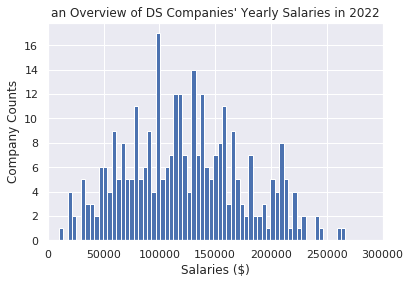

In [2]:
an_overview_of_DS_companies_salaries()

# For plot 2: 

### I will analyze statistics Data Scientists' average salaries in 2022 in USD money in different companies sizes.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd

def salaries_in_different_company_sizes():
    plt.rcdefaults()
    fig, ax = plt.subplots()

    df=pd.read_csv("ds_salaries.csv")
    df=df[['work_year','job_title','salary_in_usd','company_size']].reset_index(drop=True)
    df=df[(df['work_year']==2022) & (df['job_title']=='Data Scientist')].reset_index(drop=True)
    numbers=df.groupby(by=['company_size'])['salary_in_usd'].count()
    total=df.groupby(by=['company_size'])['salary_in_usd'].sum()
    
    data_array=[]
    for i in range(len(df.groupby(by=['company_size']).count())):
        salary=total[i]/numbers[i]
        data_array.append(salary)
    data_array = np.asarray(data_array).T
    sizes=('Large Companies', 'Middle Companies', 'Small Companies')
    y_pos = np.arange(len(sizes))
    error = np.random.rand(len(sizes))

    ax.barh(y_pos, data_array, xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sizes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Average Salaries in the Year 2022 ($)')
    ax.set_ylabel('Company Sizes')
    ax.set_title('In different sizes of company, how are "data scientists" getting paid in 2022? ')

    plt.show()

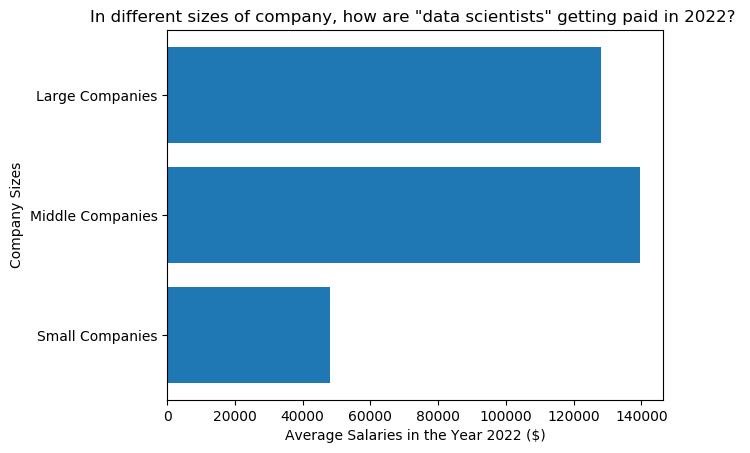

In [14]:
salaries_in_different_company_sizes()

# For plot 3:

### I will analyze statistics about the Data Science field's employees' salaries in 2022.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd

def jobs_in_data_science_field_payment():
    plt.rcdefaults()
    fig, ax = plt.subplots()
    df=pd.read_csv("ds_salaries.csv")
    df=df[['work_year','job_title','salary_in_usd','company_location']].reset_index(drop=True)
    df=df[(df['work_year']==2022) & ((df['job_title']=='Data Scientist') | (df['job_title']=='Machine Learning Scientist') | (df['job_title']=='Data Engineer') | (df['job_title']=='Data Analyst'))].reset_index(drop=True)
    salaries=df.groupby(by='job_title')['salary_in_usd'].sum()
    counts=df.groupby(by='job_title')['salary_in_usd'].count()

    data_array=[]
    for i in range(len(df.groupby(by='job_title')['salary_in_usd'].count())):
        income=salaries[i]/counts[i]
        data_array.append(income)
    data_array = np.asarray(data_array).T
    jobs=('Data Analyst', 'Data Engineer', 'Data Scientist', 'Machine Learning Scientist')
    y_pos = np.arange(len(jobs))
    error = np.random.rand(len(jobs))

    ax.barh(y_pos, data_array, xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(jobs)
    ax.invert_yaxis()

    ax.set_xlabel('Average Salaries in the Year 2022 ($)')
    ax.set_ylabel('Jobs in Data Science Field')
    ax.set_title('In different jobs, how are the employees getting paid in 2022? ')

    plt.show()

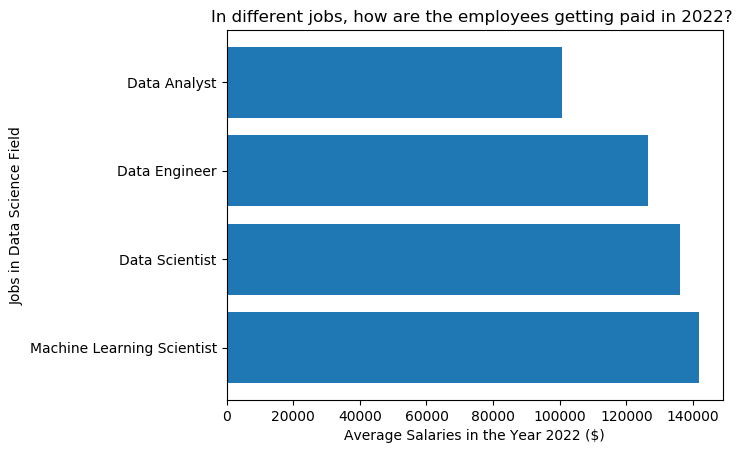

In [12]:
jobs_in_data_science_field_payment()

# For plot 4:

### I will analyze stastictics about the Data Scientist companies' distributions in 2022.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd

def data_scientist_companies_distributions():
    df=pd.read_csv("ds_salaries.csv")
    df=df[['work_year','job_title','company_location']].reset_index(drop=True)
    df=df[(df['work_year']==2022) & (df['job_title']=='Data Scientist')].reset_index(drop=True)
    df.groupby(by='company_location')['job_title'].count()

    places = 'AU', 'CA', 'CH', 'DZ', 'GB', 'IN', 'MY', 'PL', 'US'
    sizes = df.groupby(by='company_location')['job_title'].count().tolist()
    explode = (0.205,0.5,0.35,0.02,0,0.3,0.7,0,0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=places, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.set_title("the Data Scientist companies' distributions in 2022.")
    ax1.axis('equal')
    plt.show()

In [16]:
# The abbriviations are as follows:
# "AU" is short for "Australia"
# "CA" is short for "California"
# "CH" is short for "Switzerland"
# "DZ" is short for "Algeria"
# "GB" is short for "The United Kingdom of Great Britain and Northern Ireland"
# "IN" is short for "Indiana"
# "MY" is short for "Malaysia"
# "PL" is short for "Poland"
# "US" is short for "The United States"

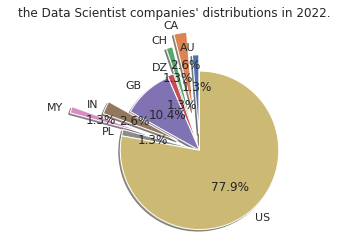

In [17]:
data_scientist_companies_distributions()